<a href="https://colab.research.google.com/github/kaycee-agent/Machine-Learning/blob/master/OT_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

## OT - Formula

https://en.wikipedia.org/wiki/Transportation_theory_(mathematics)#Optimal_transportation_on_the_real_line

Encoder = Fᵥ⁻¹∘Fᵤ and decoder =(Fᵥ⁻¹∘Fᵤ)⁻¹ = Fᵤ⁻¹∘Fᵥ

is the transport map from u to v.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


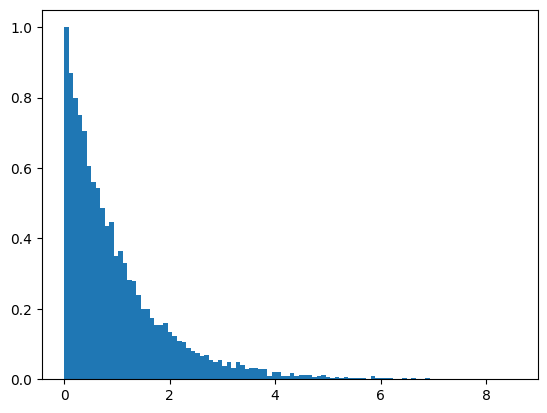

In [ ]:
N = 10_000
x = stats.expon.rvs(size=N)
plt.hist(x, bins=100, density=True);

In [ ]:
params = stats.expon.fit(x)
dist_p = stats.expon(*params)
dist_q = stats.norm(0, 1)  # target distribution
dist_n = stats.norm(*stats.norm.fit(x))

In [ ]:
def nnl(dist, x):
   return - dist.logpdf(x).mean()

nnl(dist_p, x), nnl(dist_q, x), nnl(dist_n, x)

(0.9925458706515529, 1.9086034524668751, 1.4157890277648817)

In [ ]:
lower_tol = 2**-9
upper_tol = 2**5

def encoder(x):
  x = x.clip(lower_tol, upper_tol)
  q = dist_p.cdf(x)
  y = dist_q.ppf(q)
  return y

def decoder(y):
  # y = y.clip(...)
  q = dist_q.cdf(y)
  x = dist_p.ppf(q)
  return x

In [ ]:
y = encoder(x)
print(y.min(), y.max())  # 68-95-99.7 rule

# check nnl of the encoded varaibles against target distribution
print(nnl(dist_q, x), nnl(dist_q, y))

# decode again
x_reconstructed = decoder(y)

# verify that the the reconstruction error is small.
abs(x - x_reconstructed).max()

-2.91828929811469 3.5664369140602847
1.9086034524668751 1.4252020787421331


0.0017482580467169297

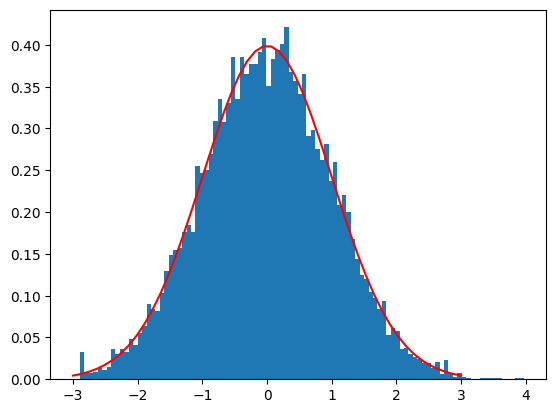

In [ ]:
t = np.linspace(-3, +3)
g = dist_q.pdf(t)

fig, ax = plt.subplots()

ax.hist(y, bins=100, density=True);
ax.plot(t, g, "-r")

# Maximum entropy distribution

https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution

-> for each of the 3 cases

1. real number line (-∞, +∞)
2. half line [0, ∞)
3. finite interval [a, b]

pick 3-4 relevant/common distributions.

For given data:

- compute nnl of fitted distributions.
- pick the best fitting one as the source distribution
- the normal distribution N(0,1) is the target.
- perform the transformation using optimal transport formula as the encoder.